In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_excel('SADCQ.xlsx')

In [4]:
data

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,XX,United States (XX),National,3,2017,14,1.3041,111,360290,1513272,...,NaN,4.0,NaN,1.0,6.0,1.0,NaN,NaN,1.0,NaN
1,XX,United States (XX),National,3,2017,14,0.2672,104,280210,1513273,...,NaN,4.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN
2,XX,United States (XX),National,3,2017,14,0.7263,201,370350,1513274,...,NaN,4.0,NaN,1.0,1.0,1.0,NaN,NaN,2.0,NaN
3,XX,United States (XX),National,3,2017,14,0.3991,113,517100,1513275,...,NaN,4.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,NaN
4,XX,United States (XX),National,3,2017,14,0.3695,214,60372,1513276,...,NaN,8.0,NaN,1.0,1.0,2.0,NaN,NaN,2.0,NaN
5,XX,United States (XX),National,3,2017,14,0.3695,214,60372,1513277,...,NaN,4.0,NaN,1.0,2.0,2.0,NaN,NaN,1.0,NaN
6,XX,United States (XX),National,3,2017,14,0.3695,214,60372,1513278,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,2.0,NaN
7,XX,United States (XX),National,3,2017,14,0.1358,113,517100,1513279,...,NaN,8.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN
8,XX,United States (XX),National,3,2017,14,1.6751,201,370350,1513280,...,NaN,8.0,NaN,1.0,2.0,2.0,NaN,NaN,1.0,NaN
9,XX,United States (XX),National,3,2017,14,0.3587,113,517100,1513281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_dropped=pd.DataFrame(data.drop(['qbikehelmet','qdrivemarijuana','qcelldriving','qpropertydamage','qbullyweight','qbullygender','qbullygay','qchokeself','qcigschool','qchewtobschool','qalcoholschool','qtypealcohol','qhowmarijuana','qmarijuanaschool','qcurrentcocaine','qcurrentheroin','qcurrentmeth','qhallucdrug','qprescription30d','qgenderexp','qtaughtHIV','qtaughtsexed','qtaughtstd','qtaughtcondom','qsportsdrink','qenergydrink','qsugardrink','qwater','qfastfood','qfoodallergy','qtaughtbc','qdietpop','qcoffeetea','sitename','sitecode','sitetype','qwenthungry','qsunscreenuse','qindoortanning','qsunburn','qconcentrating','qcurrentasthma','qwheresleep','qspeakenglish','qtransgender','sitetypenum','year','survyear','PSU','stratum','record'],axis=1))

In [6]:
data_dropped.head()

,weight,age,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,...,q81,q82,q83,q84,q85,q86,q87,q88,q89,qmusclestrength
0,1.3041,5.0,2.0,3.0,1.0,6.0,1.70,52.16,18.048443,10.333861,...,4.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0
1,0.2672,5.0,2.0,2.0,2.0,3.0,1.85,104.33,30.483565,97.657096,...,7.0,4.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,4.0
2,0.7263,5.0,2.0,2.0,4.0,2.0,1.75,44.91,14.664490,0.006242,...,7.0,6.0,1.0,1.0,2.0,5.0,2.0,5.0,7.0,4.0
3,0.3991,5.0,2.0,3.0,4.0,7.0,1.68,58.97,20.893566,50.274471,...,7.0,1.0,1.0,1.0,2.0,5.0,3.0,4.0,2.0,4.0
4,0.3695,5.0,2.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,...,4.0,6.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,8.0


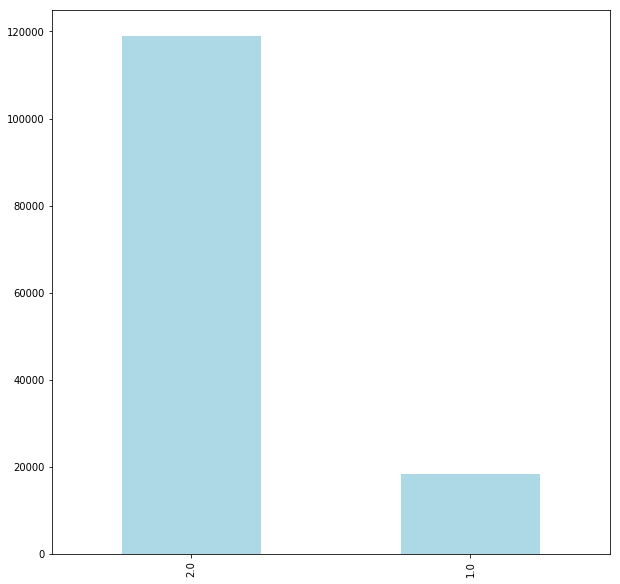

In [7]:
data_dropped['qnobese'].value_counts().plot(kind='bar', color='lightblue',figsize=(10,10))

In [55]:
Y=data_dropped['qnobese'].fillna(1)


In [9]:
X=data_dropped.drop(['qnobese'],axis=1)
X.fillna(X.mean(),inplace=True)

In [10]:
Y.value_counts()

2.0    118906
1.0     84757
Name: qnobese, dtype: int64

In [11]:
# import seaborn as sns

In [12]:
# sns.set()
# ax = sns.lineplot(x="weight", y="qnobese", data=data_dropped)

In [13]:
# sns.set()
# ax = sns.lineplot(x="bmi", y="qnobese", data=data_dropped)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
Y=Y.values

In [61]:
Y=Y.reshape(-1,1)

In [62]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X)
# y = scaler.fit_transform(Y)


array([[2.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]])

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()  
features = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
explained_variance
pca = PCA(n_components=10)  
features = pca.fit_transform(features)


In [20]:
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
target = to_categorical(y)

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3)


In [23]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [24]:
target

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(106, activation=tf.nn.relu,
                       input_shape=(xtrain.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(31, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [26]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [27]:
history= model.fit(xtrain, ytrain, epochs=30, validation_split=0.2, verbose=2)

Train on 114051 samples, validate on 28513 samples
Epoch 1/30
 - 5s - loss: 0.4729 - acc: 0.7676 - val_loss: 0.3993 - val_acc: 0.8192
Epoch 2/30
 - 4s - loss: 0.3346 - acc: 0.8578 - val_loss: 0.3171 - val_acc: 0.8694
Epoch 3/30
 - 4s - loss: 0.3089 - acc: 0.8714 - val_loss: 0.4156 - val_acc: 0.8182
Epoch 4/30
 - 4s - loss: 0.3019 - acc: 0.8755 - val_loss: 0.2846 - val_acc: 0.8811
Epoch 5/30
 - 4s - loss: 0.2922 - acc: 0.8796 - val_loss: 0.2969 - val_acc: 0.8765
Epoch 6/30
 - 4s - loss: 0.2855 - acc: 0.8823 - val_loss: 0.2755 - val_acc: 0.8868
Epoch 7/30
 - 4s - loss: 0.2820 - acc: 0.8845 - val_loss: 0.2757 - val_acc: 0.8871
Epoch 8/30
 - 4s - loss: 0.2772 - acc: 0.8859 - val_loss: 0.2783 - val_acc: 0.8846
Epoch 9/30
 - 4s - loss: 0.2737 - acc: 0.8873 - val_loss: 0.2686 - val_acc: 0.8886
Epoch 10/30
 - 4s - loss: 0.2702 - acc: 0.8885 - val_loss: 0.2841 - val_acc: 0.8813
Epoch 11/30
 - 4s - loss: 0.2677 - acc: 0.8899 - val_loss: 0.2668 - val_acc: 0.8898
Epoch 12/30
 - 4s - loss: 0.2643 -

In [28]:
model.fit(xtest,ytest,epochs=20)

Epoch 1/20
61099/61099 [==============================] - 2s 38us/step - loss: 0.2557 - acc: 0.8941
Epoch 2/20
61099/61099 [==============================] - 2s 36us/step - loss: 0.2499 - acc: 0.8949
Epoch 3/20
61099/61099 [==============================] - 2s 36us/step - loss: 0.2473 - acc: 0.8966
Epoch 4/20
61099/61099 [==============================] - 3s 50us/step - loss: 0.2455 - acc: 0.8973
Epoch 5/20
61099/61099 [==============================] - 2s 40us/step - loss: 0.2437 - acc: 0.8985
Epoch 6/20
61099/61099 [==============================] - 2s 37us/step - loss: 0.2426 - acc: 0.8990
Epoch 7/20
61099/61099 [==============================] - 2s 36us/step - loss: 0.2419 - acc: 0.8981
Epoch 8/20
61099/61099 [==============================] - 2s 36us/step - loss: 0.2406 - acc: 0.9001
Epoch 9/20
61099/61099 [==============================] - 2s 36us/step - loss: 0.2385 - acc: 0.9005
Epoch 10/20
61099/61099 [==============================] - 2s 36us/step - loss: 0.2376 - acc: 0.9004

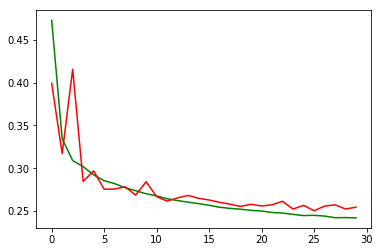

In [29]:

plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')

In [30]:
loss, accuracy = model.evaluate(xtest,ytest)
print(accuracy)

61099/61099 [==============================] - 1s 14us/step
0.9058904401044272


In [68]:
p=model.predict(xtest[:10])
for i in p:
    print(np.argmax(i))


1
1
1
0
0
0
0
0
1
1


In [67]:
q=ytest[:10]
for i in q:
    print(np.argmax(i))

0
1
1
0
0
0
1
0
1
1
